#AI&ML - Life Expectancy Prediction
#####Author: Muqadas Sohail
####Research team members
#####Mitra Bitaraf Fazel
#####Conall Edwards

#Imports

In [111]:
import pandas as pd
import numpy as np 
import sklearn as skl 

import matplotlib.pyplot as plt

#EDA
import seaborn as sns 
import missingno as msno

from sklearn import model_selection, impute, linear_model, metrics
from sklearn.preprocessing import StandardScaler

In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Extract Data

In [113]:
df = pd.read_csv('/content/drive/MyDrive/data_sets/Life Expectancy Data.csv')
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [114]:
df.columns #quick look at columns in dataset

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [115]:
#Removing leading and trailing white spaces in column names
df.columns = df.columns.str.strip()
df.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [116]:
sorted(df["Year"].unique()) #checking unique values in 'Year' column, in order

[2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


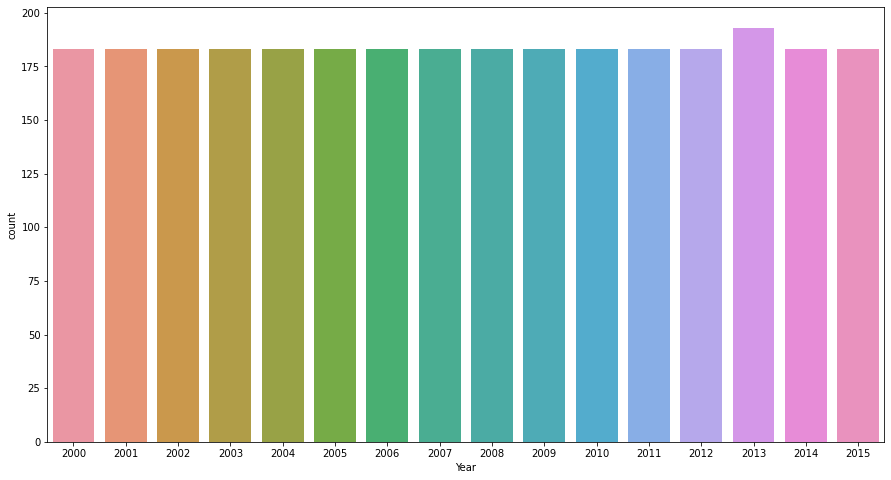

In [117]:
#freq of years
plt.figure(figsize=(15,8))
sns.countplot(df["Year"])

# Splitting into train and test and validation

In [118]:
#Temporal split due to Year column - prevent data leakage
train_temporal_df = df[df["Year"] <= 2010] #69%
validation_temporal_df = df[df["Year"] >= 2011][df["Year"] < 2013] #12%
test_temporal_df = df[df["Year"] >= 2013] #19%

<ipython-input-118-27fee1886185>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  validation_temporal_df = df[df["Year"] >= 2011][df["Year"] < 2013] #12%


In [119]:
train_temporal_df.shape

(2013, 22)

In [120]:
validation_temporal_df.shape

(366, 22)

In [121]:
test_temporal_df.shape

(559, 22)

In [122]:
#Splitting into features and target for train, test and validation
X_train = train_temporal_df.drop(labels="Life expectancy", axis=1)
Y_train = train_temporal_df['Life expectancy']

X_validation = validation_temporal_df.drop(labels="Life expectancy", axis=1)
Y_validation = validation_temporal_df['Life expectancy']

X_test = test_temporal_df.drop(labels="Life expectancy", axis=1)
Y_test = test_temporal_df['Life expectancy']

In [123]:
#Shape of subsets
print(f"X_train\nShape: {X_train.shape}\n\nX_test\nShape: {X_test.shape}\n\nX_validation\nShape: {X_validation.shape}\n")
print(f"Y_train\nShape: {Y_train.shape}\n\nY_test\nShape: {Y_test.shape}\n\nY_validation\nShape: {Y_validation.shape}\n")

X_train
Shape: (2013, 21)

X_test
Shape: (559, 21)

X_validation
Shape: (366, 21)

Y_train
Shape: (2013,)

Y_test
Shape: (559,)

Y_validation
Shape: (366,)



# EDA

In [124]:
train_temporal_df.describe() #some stats

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2013.000000,2013.000000,2013.000000,2013.000000,2001.000000,2013.000000,1516.000000,2013.000000,1991.000000,2013.000000,1994.000000,1977.000000,1994.000000,2013.000000,1711.000000,1.573000e+03,1991.000000,1991.000000,1903.000000,1903.000000
mean,2005.000000,68.330750,171.008942,32.700944,4.804488,720.428933,79.718997,2797.179334,37.011502,45.790363,81.786359,5.837876,80.808927,2.165574,6756.477922,1.234228e+07,4.975892,5.009091,0.601809,11.638623
std,3.163063,9.823112,131.428222,128.522081,3.993114,1860.999937,25.818129,12648.859348,19.495127,175.642348,23.572405,2.387730,24.852623,5.966201,13142.444569,6.287114e+07,4.530279,4.646867,0.227761,3.473634
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,3.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2002.000000,62.000000,76.000000,0.000000,1.290000,9.585584,75.000000,0.000000,18.300000,0.000000,76.000000,4.240000,76.000000,0.100000,394.176013,1.776620e+05,1.600000,1.600000,0.465000,9.700000
50%,2005.000000,71.700000,146.000000,3.000000,3.960000,67.709207,91.000000,18.000000,42.200000,4.000000,92.000000,5.670000,92.000000,0.100000,1451.297760,1.332999e+06,3.400000,3.400000,0.659000,12.000000
75%,2008.000000,75.000000,234.000000,24.000000,7.760000,420.115354,96.000000,441.000000,55.000000,32.000000,97.000000,7.400000,97.000000,1.100000,5162.297381,6.863157e+06,7.400000,7.500000,0.764000,13.900000
max,2010.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.000000,212183.000000,75.200000,2500.000000,99.000000,17.200000,99.000000,50.600000,114293.843300,1.179681e+09,27.700000,28.600000,0.936000,20.700000


In [125]:
train_temporal_df.dtypes #type of data in each column

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
BMI                                float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
HIV/AIDS                           float64
GDP                                float64
Population                         float64
thinness  1-19 years               float64
thinness 5-9 years                 float64
Income composition of resources    float64
Schooling                          float64
dtype: object

##Analysis of the target

In [126]:
Y_train.describe(include='all')

count    2013.000000
mean       68.330750
std         9.823112
min        36.300000
25%        62.000000
50%        71.700000
75%        75.000000
max        89.000000
Name: Life expectancy, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


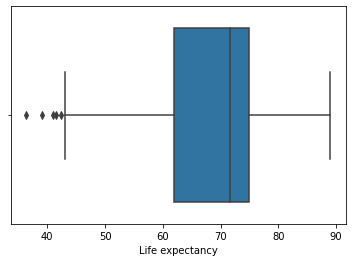

In [127]:
sns.boxplot(train_temporal_df["Life expectancy"]) #target variable - showing quartiles, range

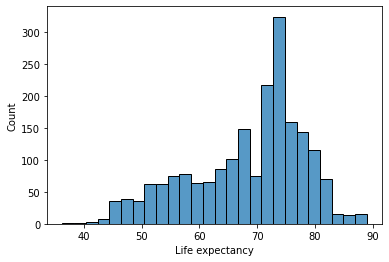

In [128]:
sns.histplot(train_temporal_df["Life expectancy"])

##Analysing the feature variables - Univariate

In [129]:
train_temporal_df.columns #checking what columns we have

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

##Analysing Country

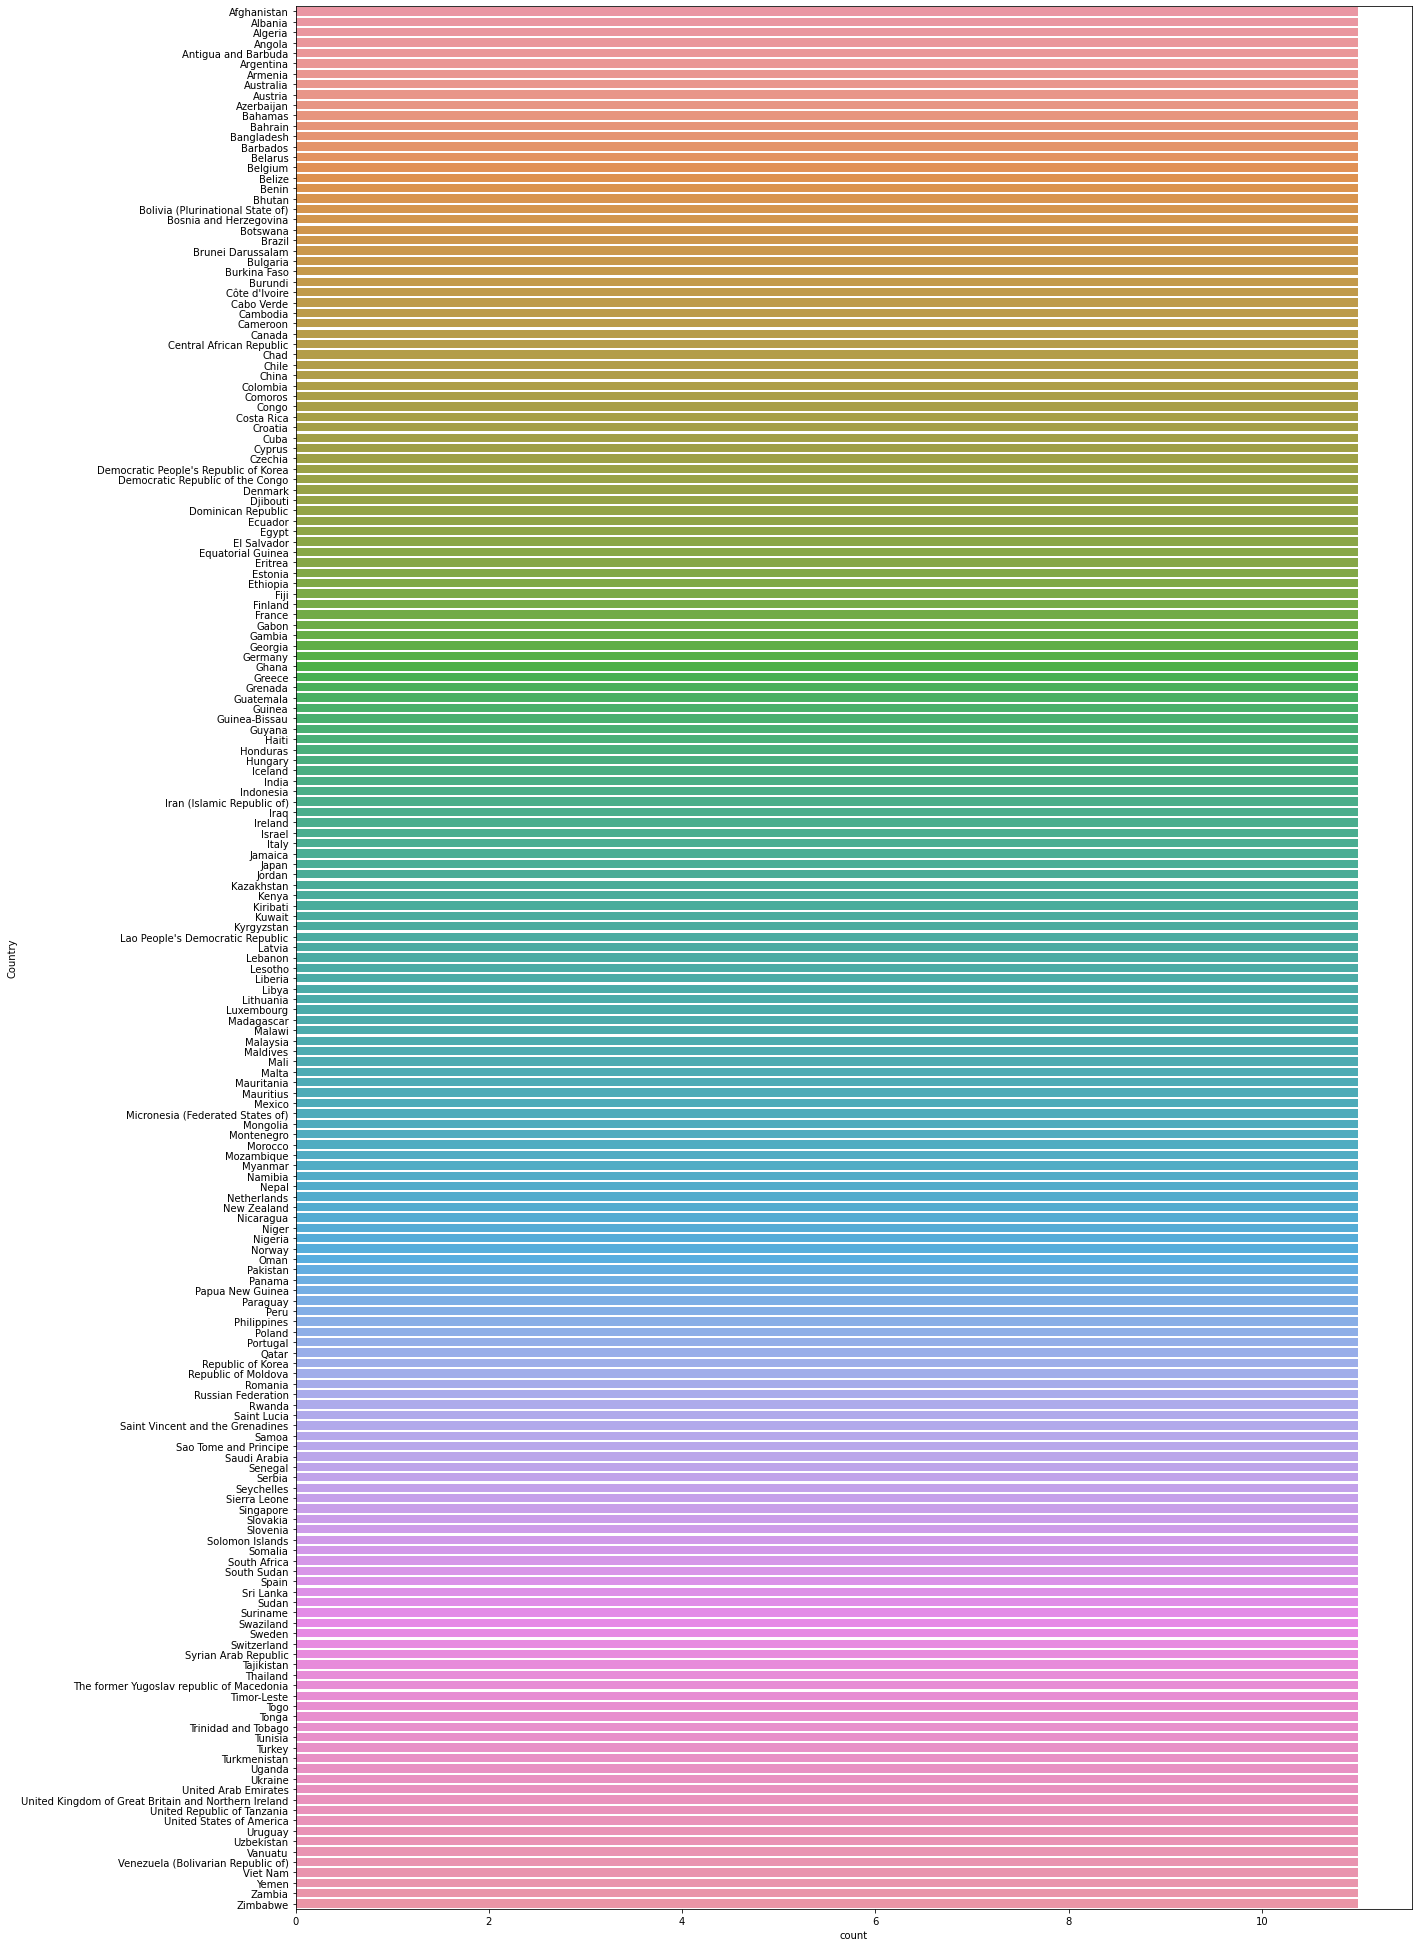

In [130]:
plt.figure(figsize=(20,35))
sns.countplot(y = train_temporal_df["Country"])

##Analysing Status

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


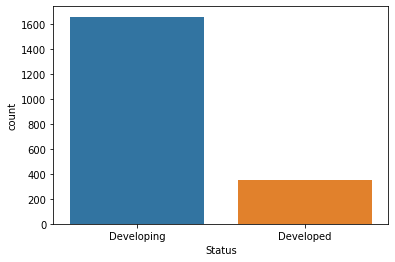

In [131]:
sns.countplot(train_temporal_df["Status"])

##Analysing Adult Mortality

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


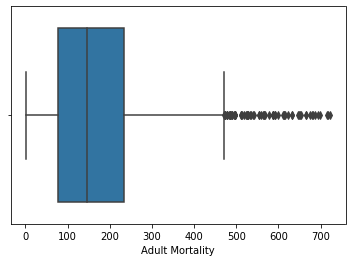

In [132]:
sns.boxplot(train_temporal_df["Adult Mortality"])

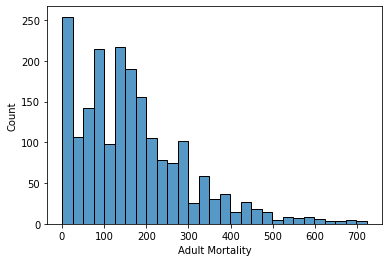

In [133]:
sns.histplot(train_temporal_df["Adult Mortality"]) #skew 

##Analysing infant deaths

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


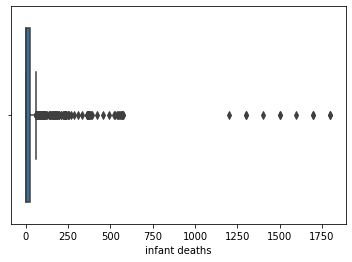

In [134]:
sns.boxplot(train_temporal_df["infant deaths"])

##Analysing Alcohol

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


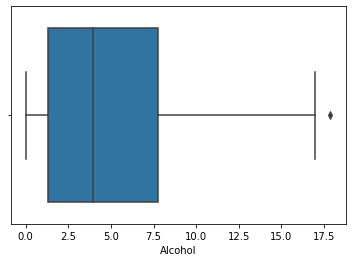

In [135]:
sns.boxplot(train_temporal_df["Alcohol"])

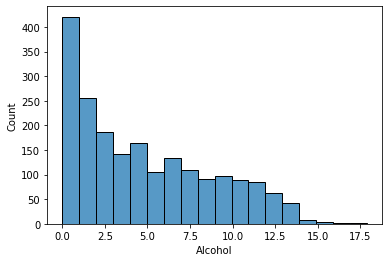

In [136]:
sns.histplot(train_temporal_df["Alcohol"]) #skew 

##Analysing percentage expenditure

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


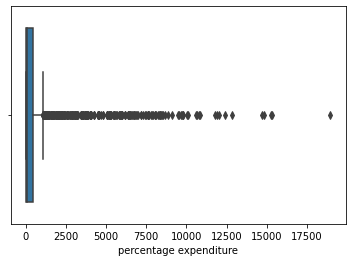

In [137]:
sns.boxplot(train_temporal_df["percentage expenditure"])

##Analysing Hepatitis B

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


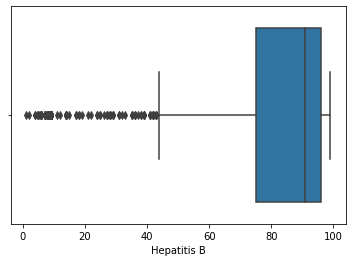

In [138]:
sns.boxplot(train_temporal_df["Hepatitis B"])

##Analysing Measles

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


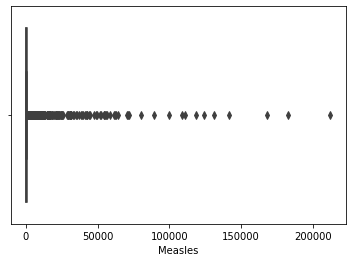

In [139]:
sns.boxplot(train_temporal_df["Measles"])

##Analysing BMI

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


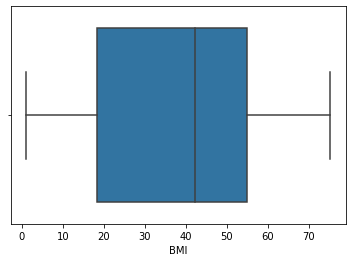

In [140]:
sns.boxplot(train_temporal_df["BMI"])

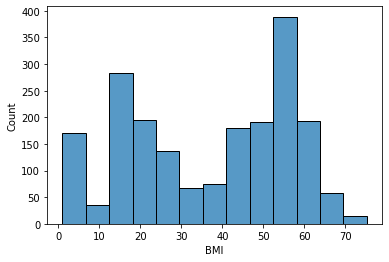

In [141]:
sns.histplot(train_temporal_df["BMI"])

##Analysing under-five deaths

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


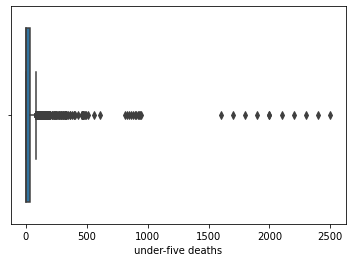

In [142]:
sns.boxplot(train_temporal_df["under-five deaths"])

##Analysing Polio

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


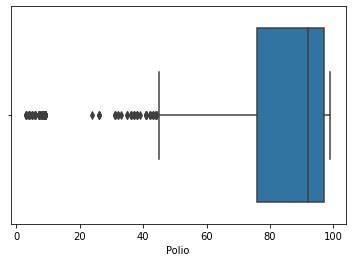

In [143]:
sns.boxplot(train_temporal_df["Polio"])

##Analysing Total expenditure

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


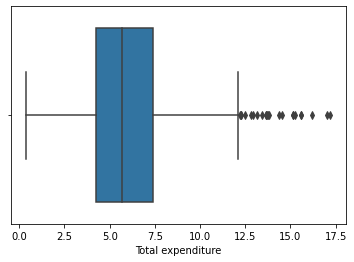

In [144]:
sns.boxplot(train_temporal_df["Total expenditure"])

##Analysing Diphtheria

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


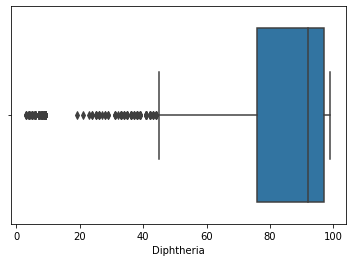

In [145]:
sns.boxplot(train_temporal_df["Diphtheria"])

##Analysing HIV/AIDS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


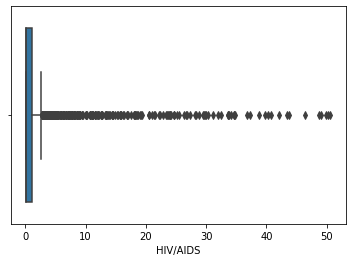

In [146]:
sns.boxplot(train_temporal_df["HIV/AIDS"])

##Analysing GDP

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


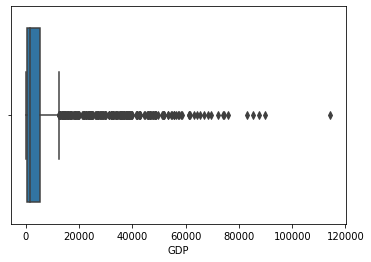

In [147]:
sns.boxplot(train_temporal_df["GDP"])

##Analysing Population

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


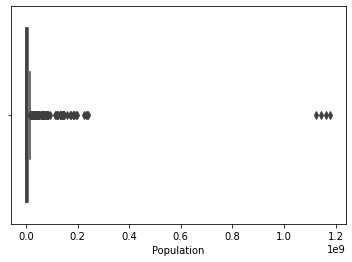

In [148]:
sns.boxplot(train_temporal_df["Population"])

##Analysing thinness  1-19 years

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


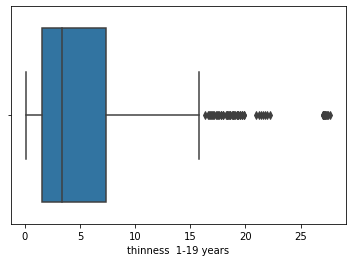

In [149]:
sns.boxplot(train_temporal_df["thinness  1-19 years"])

##Analysing thinness 5-9 years

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


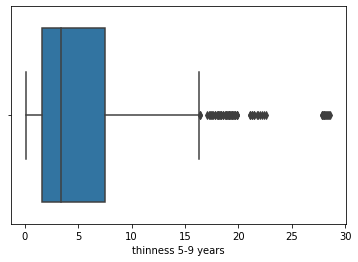

In [150]:
sns.boxplot(train_temporal_df["thinness 5-9 years"])

##Analysing Income composition of resources

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


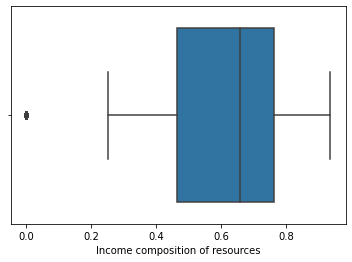

In [151]:
sns.boxplot(train_temporal_df["Income composition of resources"])

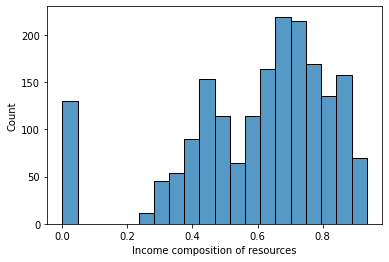

In [152]:
sns.histplot(train_temporal_df["Income composition of resources"]) #skew 

##Analysing Schooling

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


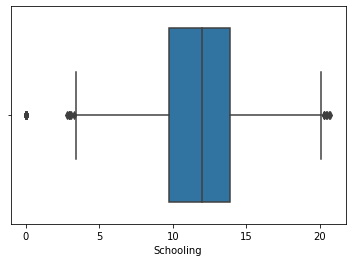

In [153]:
sns.boxplot(train_temporal_df["Schooling"])

##Multivariate Analysis

##Feature vs Feature

##Alcohol vs Adult Mortality

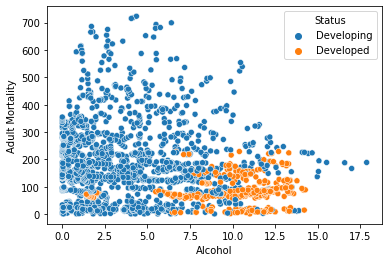

In [154]:
sns.scatterplot(data = train_temporal_df, x = 'Alcohol', y = 'Adult Mortality', hue = 'Status')

##Polio vs Diphtheria

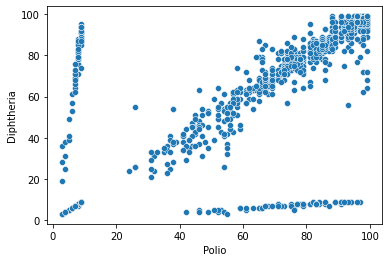

In [155]:
sns.scatterplot(data = train_temporal_df, x = 'Polio', y = 'Diphtheria') #strong positive corr

##Schooling vs BMI

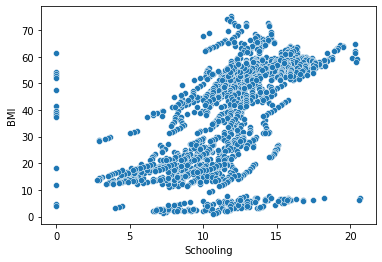

In [156]:
sns.scatterplot(data = train_temporal_df, x = 'Schooling', y = 'BMI') #positive corr

##Alcohol vs BMI

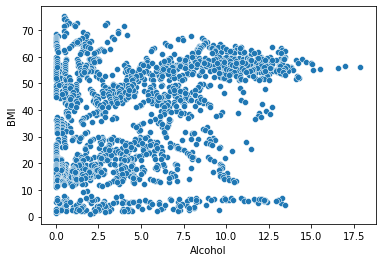

In [157]:
sns.scatterplot(data = train_temporal_df, x = 'Alcohol', y = 'BMI')

##Feature vs Target

##Life expectancy and Schooling

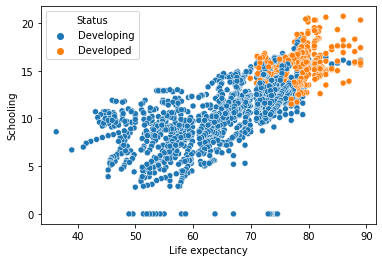

In [158]:
sns.scatterplot(data = train_temporal_df, x = 'Life expectancy', y = 'Schooling', hue='Status')

##Status vs Life expectancy

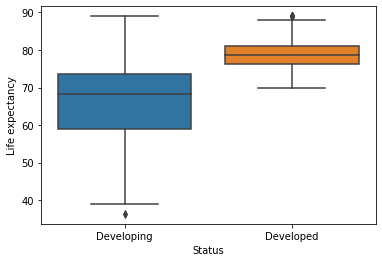

In [159]:
sns.boxplot(data = train_temporal_df, x="Status", y="Life expectancy") #high variability in developing

##Life expectancy and BMI

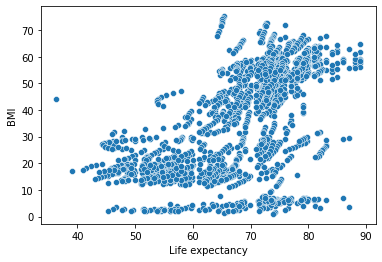

In [160]:
sns.scatterplot(data = train_temporal_df, x = 'Life expectancy', y = 'BMI')

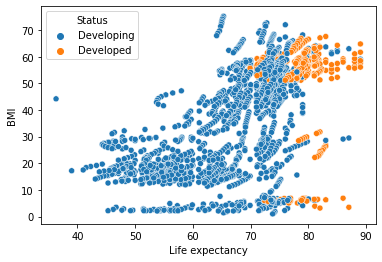

In [161]:
sns.scatterplot(data= train_temporal_df, x ='Life expectancy', y ='BMI', hue='Status')

##Income composition of resources and life expectancy

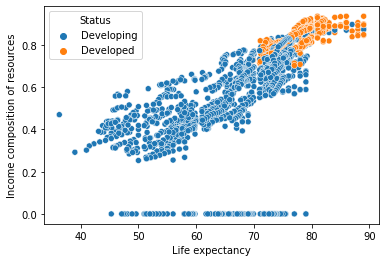

In [162]:
sns.scatterplot(data = train_temporal_df, y = 'Income composition of resources', x = 'Life expectancy', hue = 'Status')

##GDP and Life expectancy

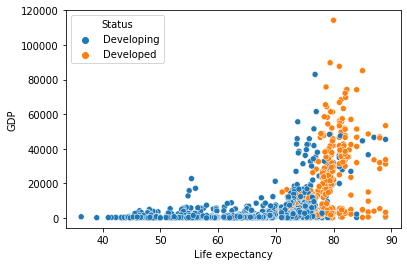

In [163]:
sns.scatterplot(data = train_temporal_df, y = 'GDP', x = 'Life expectancy', hue = 'Status')

##Adult Mortality and Life expectancy

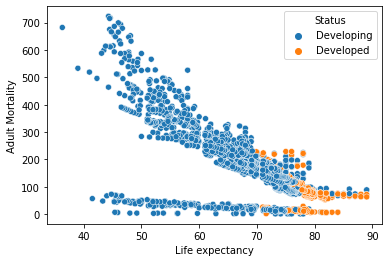

In [164]:
#strong negative corr
sns.scatterplot(data = train_temporal_df, y = 'Adult Mortality', x = 'Life expectancy', hue = 'Status') 

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


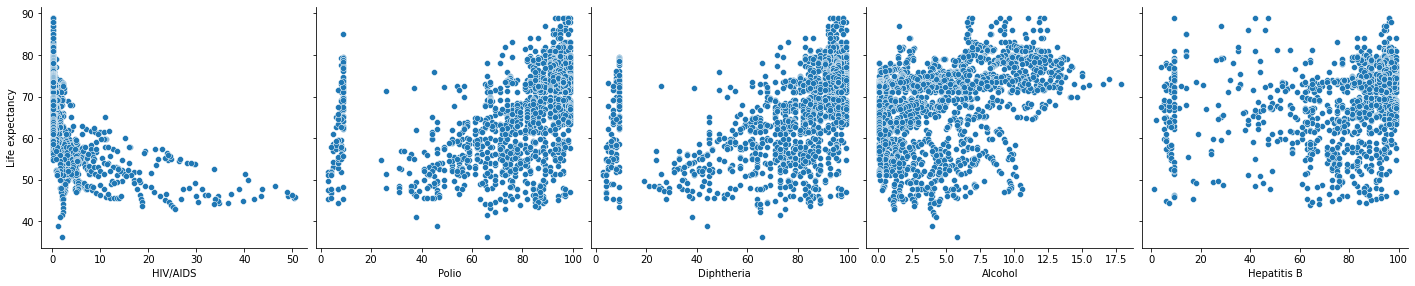

In [165]:
sns.pairplot(train_temporal_df, x_vars=['HIV/AIDS', 'Polio', 'Diphtheria', 'Alcohol', 'Hepatitis B'], y_vars='Life expectancy', size=4,aspect=1,kind='scatter')

##Visualising correlation between variables

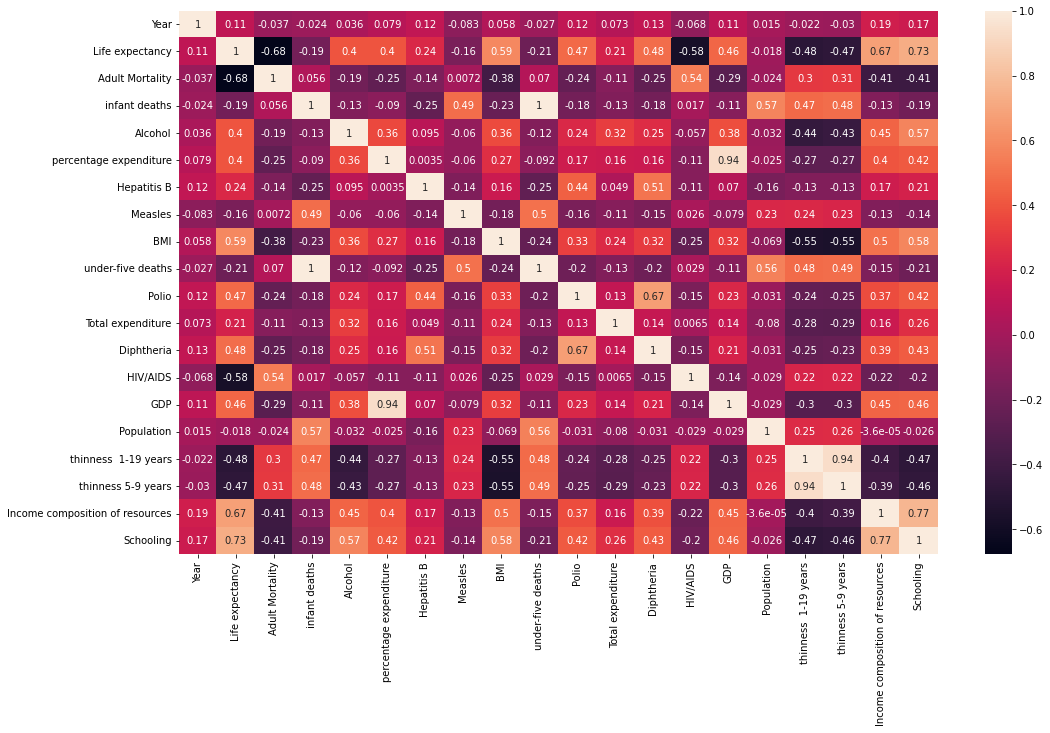

In [166]:
train_temporal_df_corr = train_temporal_df.corr(method='pearson')
plt.figure(figsize = (17,10))
sns.heatmap(train_temporal_df_corr, annot=True) #visualising correlation between variables via heatmap

# Data cleaning & pre-processing  - Training set

##Finding missing values

In [167]:
X_train.isna().sum() #sum of na values in each column

Country                              0
Year                                 0
Status                               0
Adult Mortality                      0
infant deaths                        0
Alcohol                             12
percentage expenditure               0
Hepatitis B                        497
Measles                              0
BMI                                 22
under-five deaths                    0
Polio                               19
Total expenditure                   36
Diphtheria                          19
HIV/AIDS                             0
GDP                                302
Population                         440
thinness  1-19 years                22
thinness 5-9 years                  22
Income composition of resources    110
Schooling                          110
dtype: int64

In [168]:
Y_train.isna().sum() #sum of na values in target

0

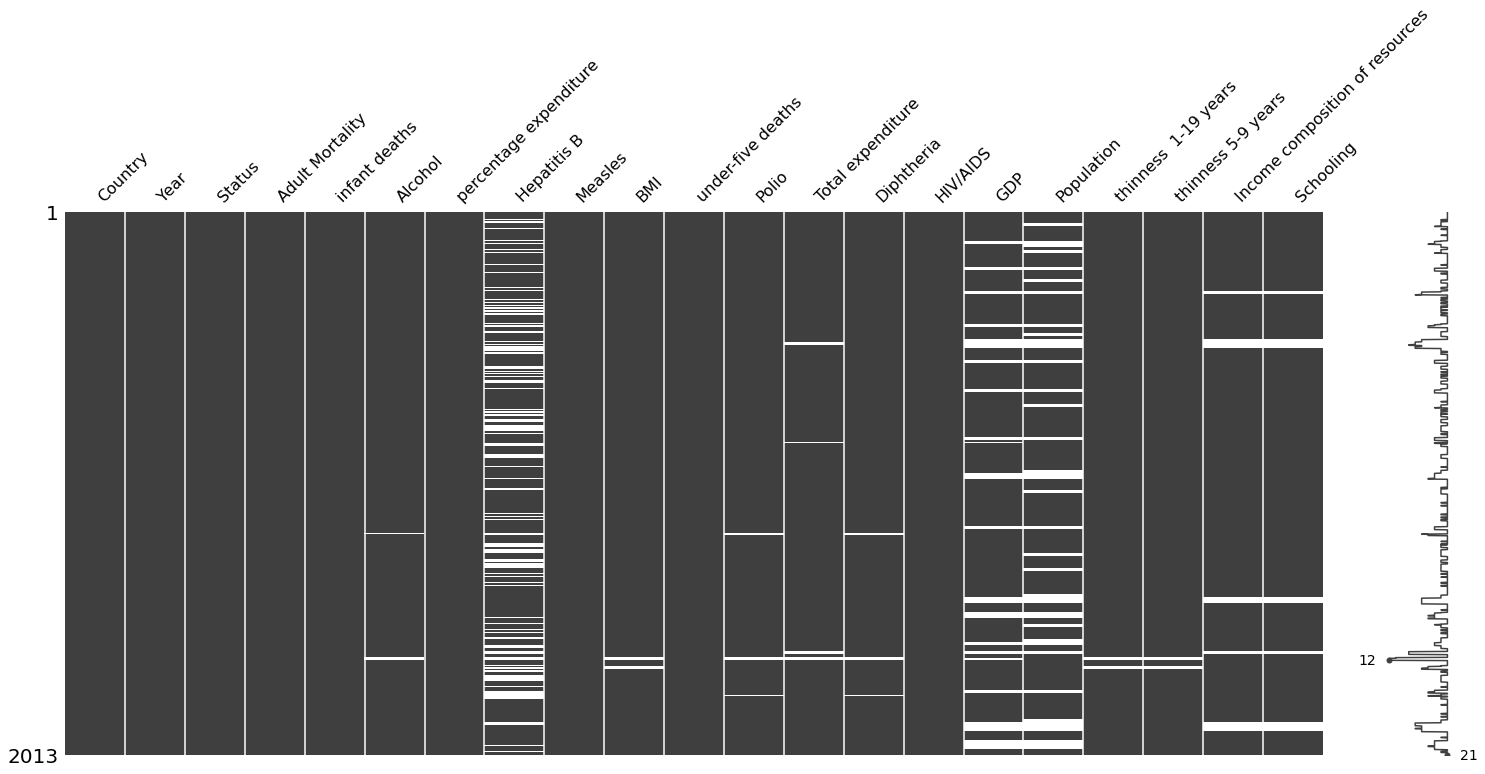

In [169]:
msno.matrix(X_train) #visual rep of missing values in training set

##Dropping columns

In [170]:
X_train= X_train.drop(labels=["Country"], axis=1) #data leakage 
X_train= X_train.drop(labels=["Population"], axis=1)
X_train= X_train.drop(labels=["Hepatitis B"], axis=1)

#same data in under-five deaths column
X_train= X_train.drop(labels=["infant deaths"], axis=1) 

#the data is included in thinness 1-19 years column
X_train= X_train.drop(labels=["thinness 5-9 years"], axis=1) 

X_train.head()

,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
5,2010,Developing,279.0,0.01,79.679367,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,18.4,0.448,9.2
6,2009,Developing,281.0,0.01,56.762217,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,18.6,0.434,8.9
7,2008,Developing,287.0,0.03,25.873925,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,18.8,0.433,8.7
8,2007,Developing,295.0,0.02,10.910156,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,19.0,0.415,8.4
9,2006,Developing,295.0,0.03,17.171518,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,19.2,0.405,8.1


##Imputing the missing values

In [171]:
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
def impute_attribute(X_train, column, imputer=imputer):
  imputer = imputer.fit(X_train[[column]])
  return imputer.transform(X_train[[column]]), imputer #imputing with the mean

In [172]:
#Imputing the NA vals for the feature columns
X_train['Alcohol'], alc_imputer = impute_attribute(X_train,'Alcohol')
X_train['BMI'], bmi_imputer = impute_attribute(X_train,'BMI')
X_train['Polio'], polio_imputer = impute_attribute(X_train,'Polio')
X_train['Total expenditure'], total_exp_imputer = impute_attribute(X_train,'Total expenditure')
X_train['Diphtheria'], dip_imputer = impute_attribute(X_train,'Diphtheria')
X_train['GDP'], gdp_imputer = impute_attribute(X_train,'GDP')
X_train['thinness  1-19 years'], thin_1_19_imputer = impute_attribute(X_train,'thinness  1-19 years')
X_train['Income composition of resources'], income_cmp_rsrc_imputer = impute_attribute(X_train,'Income composition of resources')
X_train['Schooling'], schooling_imputer = impute_attribute(X_train,'Schooling')

##Encoding

In [173]:
X_train["Status"].unique() #unique values in the Status column

array(['Developing', 'Developed'], dtype=object)

In [174]:
#Encoding 'Status' column
X_train = pd.get_dummies(X_train,drop_first=True, columns=['Status'])
X_train.head()

,Year,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Status_Developing
5,2010,279.0,0.01,79.679367,1989,16.7,102,66.0,9.20,66.0,0.1,553.328940,18.4,0.448,9.2,1
6,2009,281.0,0.01,56.762217,2861,16.2,106,63.0,9.42,63.0,0.1,445.893298,18.6,0.434,8.9,1
7,2008,287.0,0.03,25.873925,1599,15.7,110,64.0,8.33,64.0,0.1,373.361116,18.8,0.433,8.7,1
8,2007,295.0,0.02,10.910156,1141,15.2,113,63.0,6.73,63.0,0.1,369.835796,19.0,0.415,8.4,1
9,2006,295.0,0.03,17.171518,1990,14.7,116,58.0,7.43,58.0,0.1,272.563770,19.2,0.405,8.1,1


##Scaling

In [175]:
#Scaling features - standardisation
cols_to_standardise = ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Measles',
                       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS',
                       'GDP', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


X_train[cols_to_standardise] = StandardScaler().fit_transform(X_train[cols_to_standardise])

#std_scl = StandardScaler()
#std_scl.fit(X_train)
#X_train_preproc = std_scl.transform(X_train)

In [176]:
#viewing features after scaling
X_train.head() 

,Year,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Status_Developing
5,2010,0.821877,-1.204585,-0.344389,-0.063909,-1.047879,0.320103,-0.673048,1.421206,-0.598852,-0.346299,-0.512106,2.980272,-0.694735,-0.722233,1
6,2009,0.837099,-1.204585,-0.356707,0.005047,-1.073675,0.342882,-0.800953,1.514202,-0.720168,-0.346299,-0.520975,3.024673,-0.757971,-0.811082,1
7,2008,0.882762,-1.199560,-0.373309,-0.094750,-1.099470,0.365661,-0.758318,1.053448,-0.679729,-0.346299,-0.526963,3.069075,-0.762488,-0.870315,1
8,2007,0.943647,-1.202073,-0.381351,-0.130968,-1.125265,0.382746,-0.800953,0.377110,-0.720168,-0.346299,-0.527254,3.113477,-0.843791,-0.959164,1
9,2006,0.943647,-1.199560,-0.377986,-0.063830,-1.151060,0.399830,-1.014127,0.673008,-0.922361,-0.346299,-0.535285,3.157879,-0.888960,-1.048013,1


In [177]:
#Scaling target - standardisation
Y_train = pd.DataFrame(Y_train)
Y_train = StandardScaler().fit_transform(Y_train)

#Data cleaning & pre-processing - Validation set

##Dropping columns

In [178]:
X_validation= X_validation.drop(labels=["Country"], axis=1) 
X_validation= X_validation.drop(labels=["Population"], axis=1) 
X_validation= X_validation.drop(labels=["Hepatitis B"], axis=1)

#same data in under-five deaths columns, high corr
X_validation= X_validation.drop(labels=["infant deaths"], axis=1)  

#the data is included in thinness 1-19 years column, high corr
X_validation= X_validation.drop(labels=["thinness 5-9 years"], axis=1) 

X_validation.head()

,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
3,2012,Developing,272.0,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8
4,2011,Developing,275.0,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5
19,2012,Developing,86.0,5.14,412.443356,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,1.3,0.752,14.2
20,2011,Developing,88.0,5.37,437.062100,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,1.4,0.738,13.3
35,2012,Developing,113.0,0.66,555.926083,18,56.1,24,95.0,6.14,95.0,0.1,5564.825660,5.9,0.732,14.4


##Missing values

In [179]:
X_validation.isna().sum() #sum of na values in each column

Year                                0
Status                              0
Adult Mortality                     0
Alcohol                             2
percentage expenditure              0
Measles                             0
BMI                                 4
under-five deaths                   0
Polio                               0
Total expenditure                   5
Diphtheria                          0
HIV/AIDS                            0
GDP                                56
thinness  1-19 years                4
Income composition of resources    20
Schooling                          20
dtype: int64

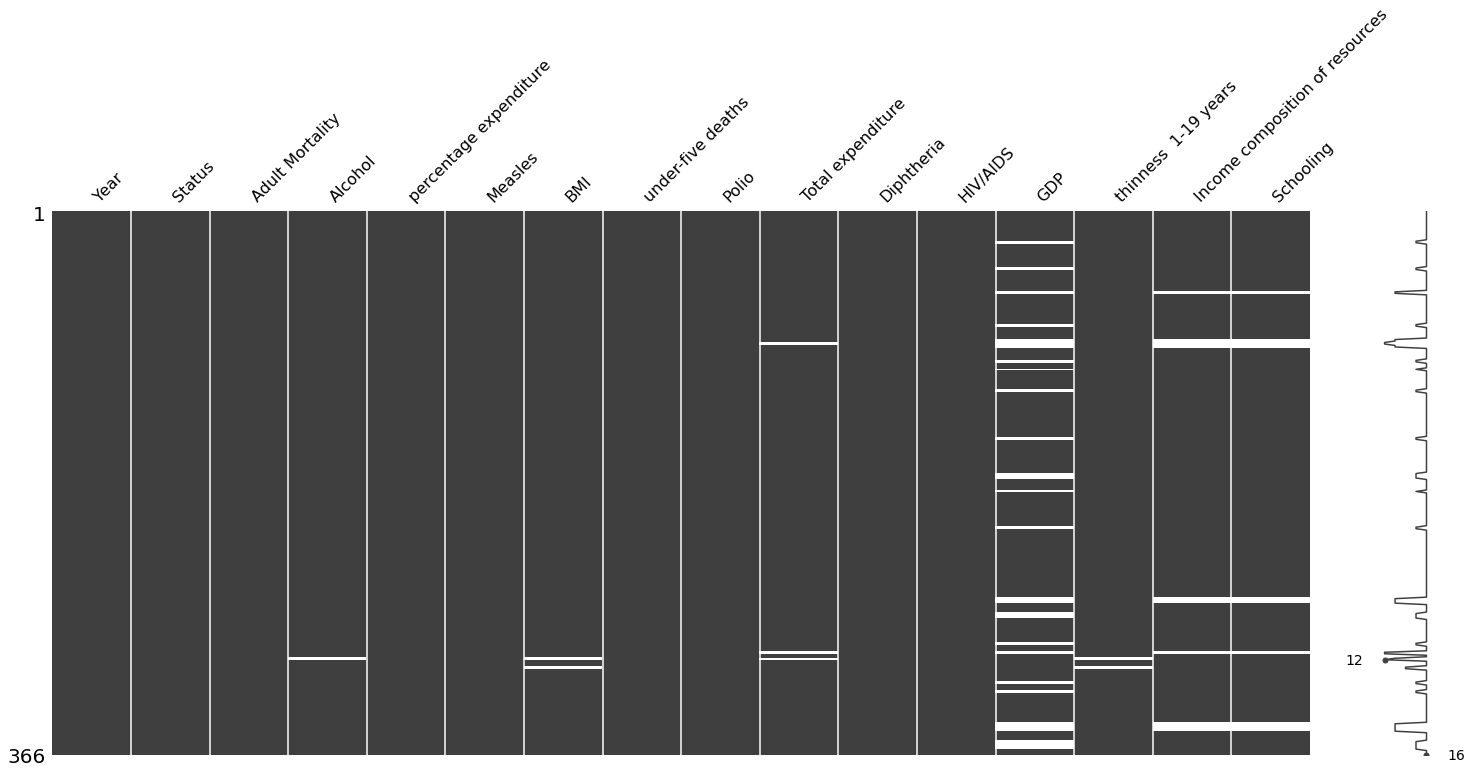

In [180]:
msno.matrix(X_validation)

In [181]:
Y_validation.isna().sum() #sum of na values

0

##Imputing the missing values

In [182]:
#Imputing with the mean
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
def impute_attribute(X_validation, column, imputer=imputer):
  imputer = imputer.fit(X_validation[[column]])
  return imputer.transform(X_validation[[column]]), imputer

In [183]:
X_validation['Alcohol'], alc_imputer = impute_attribute(X_validation,'Alcohol')
X_validation['BMI'], bmi_imputer = impute_attribute(X_validation,'BMI')
X_validation['Total expenditure'], total_exp_imputer = impute_attribute(X_validation,'Total expenditure')
X_validation['GDP'], gdp_imputer = impute_attribute(X_validation,'GDP')
X_validation['thinness  1-19 years'], thin_1_19_imputer = impute_attribute(X_validation,'thinness  1-19 years')
X_validation['Income composition of resources'], income_cmp_rsrc_imputer = impute_attribute(X_validation,'Income composition of resources')
X_validation['Schooling'], schooling_imputer = impute_attribute(X_validation,'Schooling')

##Encoding

In [184]:
#Encoding 'Status' column
X_validation = pd.get_dummies(X_validation,drop_first=True, columns=['Status'])
X_validation.head()

,Year,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Status_Developing
3,2012,272.0,0.01,78.184215,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,0.463,9.8,1
4,2011,275.0,0.01,7.097109,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,0.454,9.5,1
19,2012,86.0,5.14,412.443356,9,55.8,1,99.0,5.59,99.0,0.1,4247.614380,1.3,0.752,14.2,1
20,2011,88.0,5.37,437.062100,28,55.1,1,99.0,5.71,99.0,0.1,4437.178680,1.4,0.738,13.3,1
35,2012,113.0,0.66,555.926083,18,56.1,24,95.0,6.14,95.0,0.1,5564.825660,5.9,0.732,14.4,1


##Scaling

In [185]:
#Scaling features - standardisation
cols_to_standardise = ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Measles',
                       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS',
                       'GDP', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


X_validation[cols_to_standardise] = StandardScaler().fit_transform(X_validation[cols_to_standardise])

In [186]:
#Scaling target - standardisation
Y_validation = pd.DataFrame(Y_validation)
Y_validation = StandardScaler().fit_transform(Y_validation)

#Data cleaning & pre-processing - Testing set

##Dropping columns

In [187]:
X_test= X_test.drop(labels=["Country"], axis=1) #data leakage 
X_test= X_test.drop(labels=["Population"], axis=1)
X_test= X_test.drop(labels=["Hepatitis B"], axis=1)

#same data in under-five deaths columns
X_test= X_test.drop(labels=["infant deaths"], axis=1) 

#the data is included in thinness 1-19 years column
X_test= X_test.drop(labels=["thinness 5-9 years"], axis=1)

X_test.head()

,Year,Status,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling
0,2015,Developing,263.0,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1
1,2014,Developing,271.0,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0
2,2013,Developing,268.0,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9
16,2015,Developing,74.0,4.60,364.975229,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,1.2,0.762,14.2
17,2014,Developing,8.0,4.51,428.749067,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,1.2,0.761,14.2


##Missing values

In [188]:
X_test.isna().sum() #sum of na values in each column

Year                                 0
Status                               0
Adult Mortality                     10
Alcohol                            180
percentage expenditure               0
Measles                              0
BMI                                  8
under-five deaths                    0
Polio                                0
Total expenditure                  185
Diphtheria                           0
HIV/AIDS                             0
GDP                                 90
thinness  1-19 years                 8
Income composition of resources     37
Schooling                           33
dtype: int64

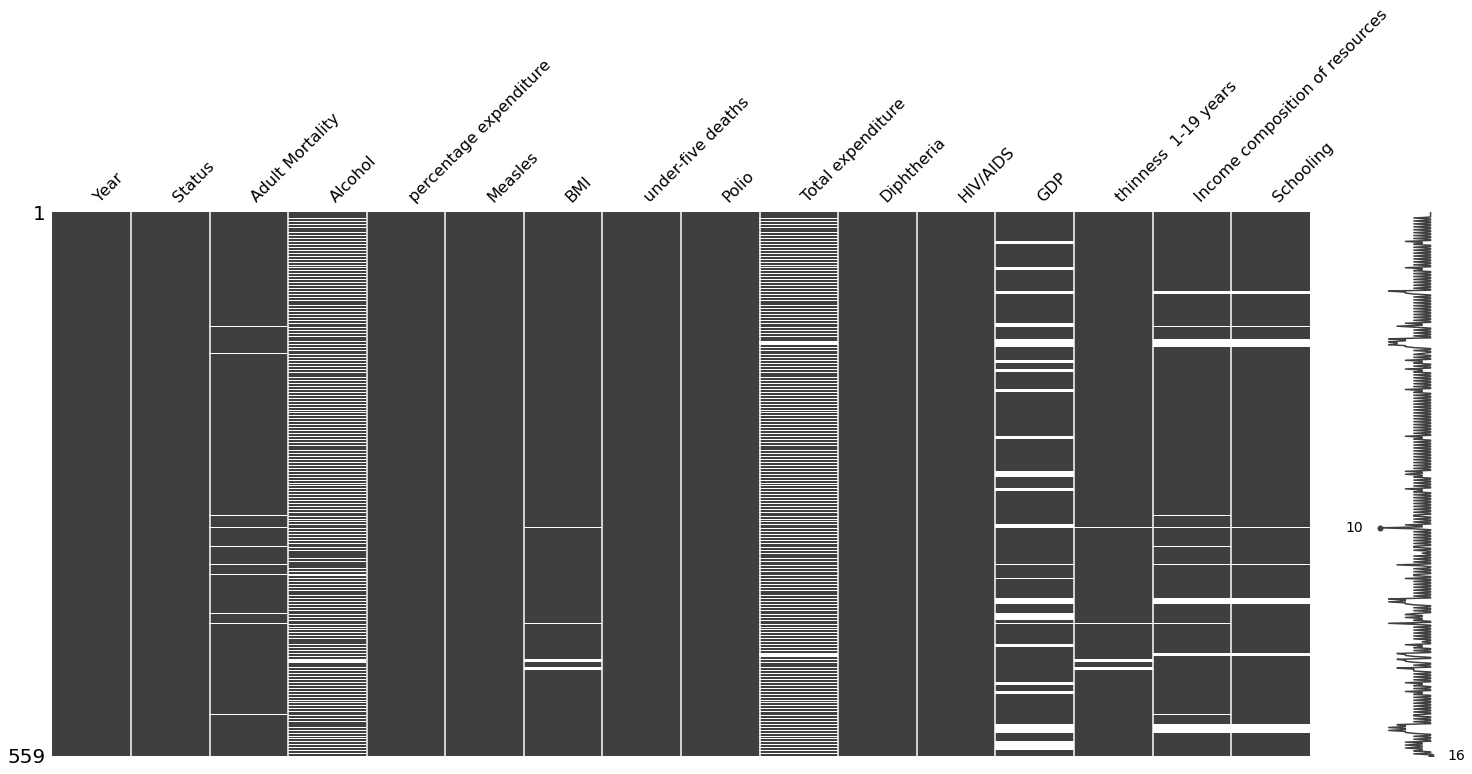

In [189]:
msno.matrix(X_test)

##Removing NA vals from Life expectancy column

In [190]:
Y_test.isna().sum() #sum of na values in target

10

In [191]:
#Displaying the index at which there is an NA val
for i,j in Y_test.items():
  if (np.isnan(j)):
    print("Index:", i)

Index: 624
Index: 769
Index: 1650
Index: 1715
Index: 1812
Index: 1909
Index: 1958
Index: 2167
Index: 2216
Index: 2713


In [192]:
#removing missing vals in life expectancy column
Y_test = Y_test.dropna(how = 'any')
Y_test

0       65.0
1       59.9
2       59.9
16      77.8
17      77.5
        ... 
2907    61.1
2908    63.0
2922    67.0
2923    59.2
2924    58.0
Name: Life expectancy, Length: 549, dtype: float64

In [193]:
#Removing the correspoding rows in the feature columns
X_test = X_test.drop(labels=[624,769, 1650, 1715, 1812, 1909, 1958, 2167, 2216, 2713], axis=0)

##Imputing missing values

In [194]:
imputer = impute.SimpleImputer(missing_values=np.nan, strategy='mean')
def impute_attribute(X_test, column, imputer=imputer):
  imputer = imputer.fit(X_test[[column]])
  return imputer.transform(X_test[[column]]), imputer

In [195]:
X_test['Adult Mortality'], adult_mort_imputer = impute_attribute(X_test,'Adult Mortality')
X_test['Alcohol'], alc_imputer = impute_attribute(X_test,'Alcohol')
X_test['BMI'], bmi_imputer = impute_attribute(X_test,'BMI')
X_test['Total expenditure'], total_exp_imputer = impute_attribute(X_test,'Total expenditure')
X_test['GDP'], gdp_imputer = impute_attribute(X_test,'GDP')
X_test['thinness  1-19 years'], thin_1_19_imputer = impute_attribute(X_test,'thinness  1-19 years')
X_test['Income composition of resources'], income_cmp_rsrc_imputer = impute_attribute(X_test,'Income composition of resources')
X_test['Schooling'], schooling_imputer = impute_attribute(X_test,'Schooling')

##Encoding

In [196]:
#Encoding 'Status' column
X_test = pd.get_dummies(X_test,drop_first=True, columns=['Status'])
X_test.head()

,Year,Adult Mortality,Alcohol,percentage expenditure,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,Income composition of resources,Schooling,Status_Developing
0,2015,263.0,0.01,71.279624,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,0.479,10.1,1
1,2014,271.0,0.01,73.523582,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,0.476,10.0,1
2,2013,268.0,0.01,73.219243,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,0.470,9.9,1
16,2015,74.0,4.60,364.975229,0,58.0,0,99.0,6.00,99.0,0.1,3954.227830,1.2,0.762,14.2,1
17,2014,8.0,4.51,428.749067,0,57.2,1,98.0,5.88,98.0,0.1,4575.763787,1.2,0.761,14.2,1


##Scaling

In [197]:
#Scaling features - standardisation
cols_to_standardise = ['Adult Mortality', 'Alcohol', 'percentage expenditure', 'Measles',
                       'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS',
                       'GDP', 'thinness  1-19 years', 'Income composition of resources', 'Schooling']


X_test[cols_to_standardise] = StandardScaler().fit_transform(X_test[cols_to_standardise])

In [198]:
#Scaling target - standardisation
Y_test = pd.DataFrame(Y_test)
Y_test = StandardScaler().fit_transform(Y_test)

# Initial model - Model 0

In [199]:
#Fitting the model with training set
lin_reg = linear_model.LinearRegression()
lin_reg = lin_reg.fit(X_train, Y_train)

In [200]:
#lin_reg.intercept_

In [201]:
#lin_reg.coef_

In [202]:
#Predicting on train and validation
Y_train_pred = lin_reg.predict(X_train)

Y_validation_pred = lin_reg.predict(X_validation)


#Y_test_pred = lin_reg.predict(X_test) 

#Evaluation metrics

##R^2

In [203]:
#r^2 score on training and validation set
print("R^2 score on train: %f\nR2 score on validation: %f" % \
        (metrics.r2_score(Y_train, Y_train_pred), 
        metrics.r2_score(Y_validation, Y_validation_pred)))

R^2 score on train: 0.808264
R2 score on validation: 0.818014


##R^2 score on all team members models - (on seen and unseen data (validation set))

In [204]:
#create df with r2 score on train and validation set on models
models = pd.DataFrame({'Model' : ['Linear regression', 'Decision tree regression', 'Support Vector regression','Linear regression', 'Decision tree regression', 'Support Vector regression'],
                       'R^2_Score' : [0.808264, 0.983469, 0.929194, 0.818014, 0.895290, 0.818254],
                       'Data' : ['seen', 'seen', 'seen', 'unseen', 'unseen', 'unseen']})
models

,Model,R^2_Score,Data
0,Linear regression,0.808264,seen
1,Decision tree regression,0.983469,seen
2,Support Vector regression,0.929194,seen
3,Linear regression,0.818014,unseen
4,Decision tree regression,0.895290,unseen
5,Support Vector regression,0.818254,unseen


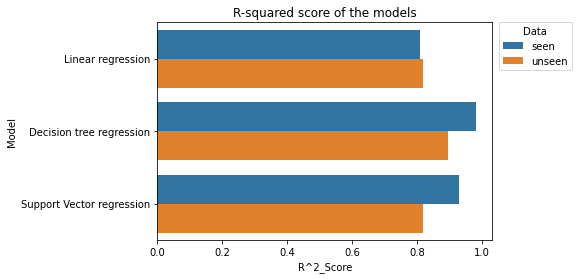

In [205]:
#Visualising the R2 on team members models on seen and unseen data 
sns.barplot(x='R^2_Score', y='Model', data= models, hue='Data').set(title='R-squared score of the models')
plt.legend(title= 'Data', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0) #legend outside plot box

##MAE

In [206]:
#MAE on training and validation set
print("MAE on train: %f\nMAE on validation: %f" % \
        (metrics.mean_absolute_error(Y_train, Y_train_pred), 
        metrics.mean_absolute_error(Y_validation, Y_validation_pred)))

MAE on train: 0.329936
MAE on validation: 0.322788


In [207]:
#MAE on train, test and validation
#X_train_mae = metrics.mean_absolute_error(Y_train, Y_train_pred)
#X_train_mae
#X_validation_mae = metrics.mean_absolute_error(Y_validation, Y_validation_pred)
#X_test_mae = metrics.mean_absolute_error(Y_test, Y_test_pred)

##MSE

In [208]:
#MSE on train and validation
print("MSE on train: %f\nMSE on validation: %f" % \
        (metrics.mean_squared_error(Y_train, Y_train_pred), 
        metrics.mean_squared_error(Y_validation, Y_validation_pred)))

MSE on train: 0.191736
MSE on validation: 0.181986


In [209]:
#MSE on train, test and validation
#X_train_mse = mean_squared_error(Y_train, Y_train_pred)
#X_validation_mse = mean_squared_error(Y_validation, Y_validation_pred)
#X_test_mse = mean_squared_error(Y_test, Y_test_pred)

##RMSE

In [210]:
#RMSE on train and validation
print("RMSE on train: %f\nRMSE on validation: %f" % \
        (metrics.mean_squared_error(Y_train, Y_train_pred, squared=False), 
        metrics.mean_squared_error(Y_validation, Y_validation_pred, squared=False)))

RMSE on train: 0.437877
RMSE on validation: 0.426598


In [211]:
#RMSE on train, test and validation
#X_train_rmse = mean_squared_error(Y_train, Y_train_pred, squared=False)
#X_validation_rmse = mean_squared_error(Y_validation, Y_validation_pred, squared=False)
#X_test_rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)